This is Sumner's implementation of 12 steps to Navier-Stokes from [CFD Python](https://github.com/barbagroup/CFDPython)

# Step 1: 1D Linear Convection
$$\frac{\partial u}{\partial t} + c \frac{\partial u}{\partial x} = 0$$
Let the initial condition be $u(x,0)=u_0(x)$. Then the exact solution of the equation is $u(x,t)=u_0(x-ct)$.
We discretize this equation in both space and time, using the Forward Difference scheme for the time derivative and the Backward Difference scheme for the space derivative.

$$\frac{u_i^{n+1}-u_i^n}{\Delta t} + c \frac{u_i^n - u_{i-1}^n}{\Delta x} = 0 $$

... solving for $u_i^{n+1}$, we get 

$$u_i^{n+1} = u_i^n - c \frac{\Delta t}{\Delta x}(u_i^n-u_{i-1}^n)$$

In [1]:
import numpy 
from matplotlib import pyplot as plt
import time, sys

We want to define an evenly spaced grid of points within a spatial domain that is 2 units of length wide, i.e., $x_i\in(0,2)$.  We'll define a variable `nx`, which will be the number of grid points we want and `dx` will be the distance between any pair of adjacent grid points.  

We also need to set up our initial conditions. The initial velocity $u_0$ is given as 
$u = 2$ in the interval $0.5 \leq x \leq 1$  and $u = 1$ everywhere else in $(0,2)$ (i.e., a hat function).

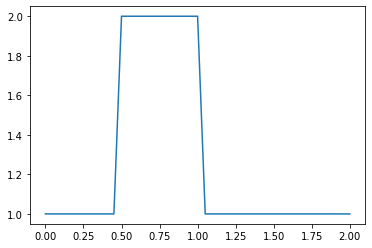

In [2]:
nx = 41  
dx = 2 / (nx-1)
nt = 25    #nt is the number of timesteps we want to calculate
dt = .025  #dt is the amount of time each timestep covers (delta t)
c = 1      #assume wavespeed of c = 1

def create_u(nx, dx):
    u = numpy.ones(nx)      #numpy function ones()
    u[int(.5 / dx):int(1 / dx + 1)] = 2  #setting u = 2 between 0.5 and 1 as per our I.C.s    
    return u

u = create_u(nx, dx)
plt.plot(numpy.linspace(0, 2, nx), u);

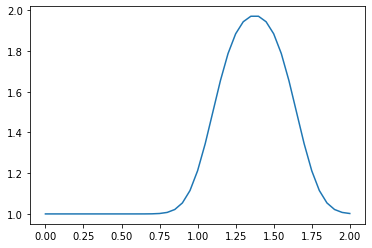

In [3]:
def calculate_u_all(u, nx, dx, nt, dt):

    # first create u
    u = create_u(nx, dx)
    
    # initialize a variable u_all that will store all the values of u for all time steps
    u_all = numpy.empty((nt, nx))

    #loop for values of n from 0 to nt, so it will run nt times
    for n in range(nt):
        un = u.copy()
        for i in range(1, nx):
            u[i] = un[i] - c * dt / dx * (un[i] - un[i-1])
        # fill in u_all with the values of u at each time step
        u_all[n, :] = u
    
    return u_all

u_all = calculate_u_all(u, nx, dx, nt, dt)
plt.plot(numpy.linspace(0, 2, nx), u_all[-1, :]);

let's plot a 2D version of this in time and space

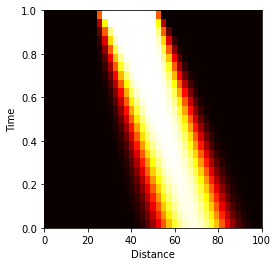

In [4]:
def plot_time_and_space(data):
    # plot a 2d graph of the solution in time and space
    fig, ax = plt.subplots()
    plt.imshow(data[:, :], cmap='hot', interpolation='nearest', extent=[0,100,0,1], aspect=100)
    # label the axes
    plt.xlabel('Distance')
    plt.ylabel('Time')
    # show the plot
    plt.show()    

plot_time_and_space(u_all)

Now let's see what happens if we mess with the parameters

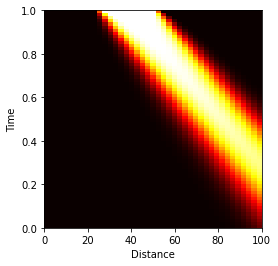

In [5]:
# longer (time) simulation
nt = 70    #nt is the number of timesteps we want to calculate

u_all = calculate_u_all(u, nx, dx, nt, dt)
plot_time_and_space(u_all)

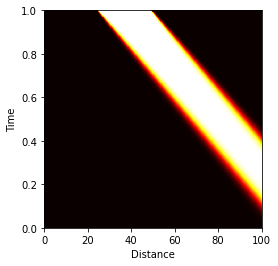

In [6]:
# let's get finer
nt = 10*nt 
dt = dt/10 
nx = 10*nx
dx = dx/10

u_all = calculate_u_all(u, nx, dx, nt, dt)
plot_time_and_space(u_all)

...yikes, that drastically changes the wave. 